## **House Prices - Advanced Regression Techniques**

### Import library and Load data

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [94]:
path="/kaggle/input/house-prices-advanced-regression-techniques/"

In [95]:
df_train=pd.read_csv(path+'train.csv')
df_test=pd.read_csv(path+'test.csv')
df_train.shape,df_test.shape

((1460, 81), (1459, 80))

In [96]:
df_submission=pd.read_csv(path+'sample_submission.csv',index_col=False)

In [97]:
df=pd.concat([df_train,df_test],axis=0,ignore_index=True)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


* We combine `df_train` and `df_test` into `df` to facilitate visualization and data processing. 

### EDA and Visualize

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [99]:
categorical_cols=df.select_dtypes(include='object').columns
numerical_cols=df.select_dtypes(include=['int64','float64']).columns
categorical_cols,numerical_cols

(Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
        'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
        'SaleType', 'SaleCondition'],
       dtype='object'),
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 

* Visualize the relationship between variables and 'SalePrice' for each categorical data type and numerical data type.
* Visualize correlation between variables following highest correlation and lowest correlation.

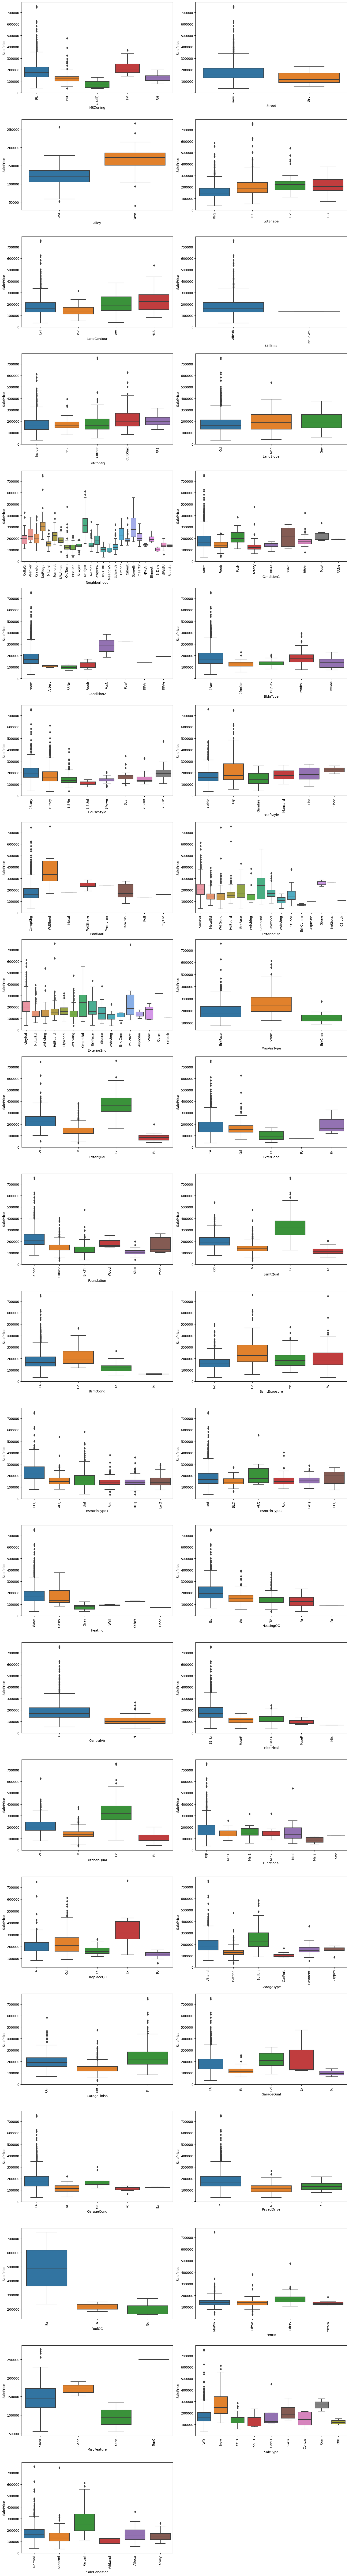

In [100]:
# Box plot categorical columns
num_rows = math.ceil(len(categorical_cols) / 2)
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))
for i, col in enumerate(categorical_cols):
    row_idx = i // 2
    col_idx = i % 2
    ax = axes[row_idx, col_idx]
    sns.boxplot(data=df, x=col, y='SalePrice', ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('SalePrice')
    ax.tick_params(axis='x', rotation=90)  

if len(categorical_cols) % 2 != 0:
    fig.delaxes(axes[num_rows-1, 1])

plt.tight_layout()
plt.show()

In [101]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


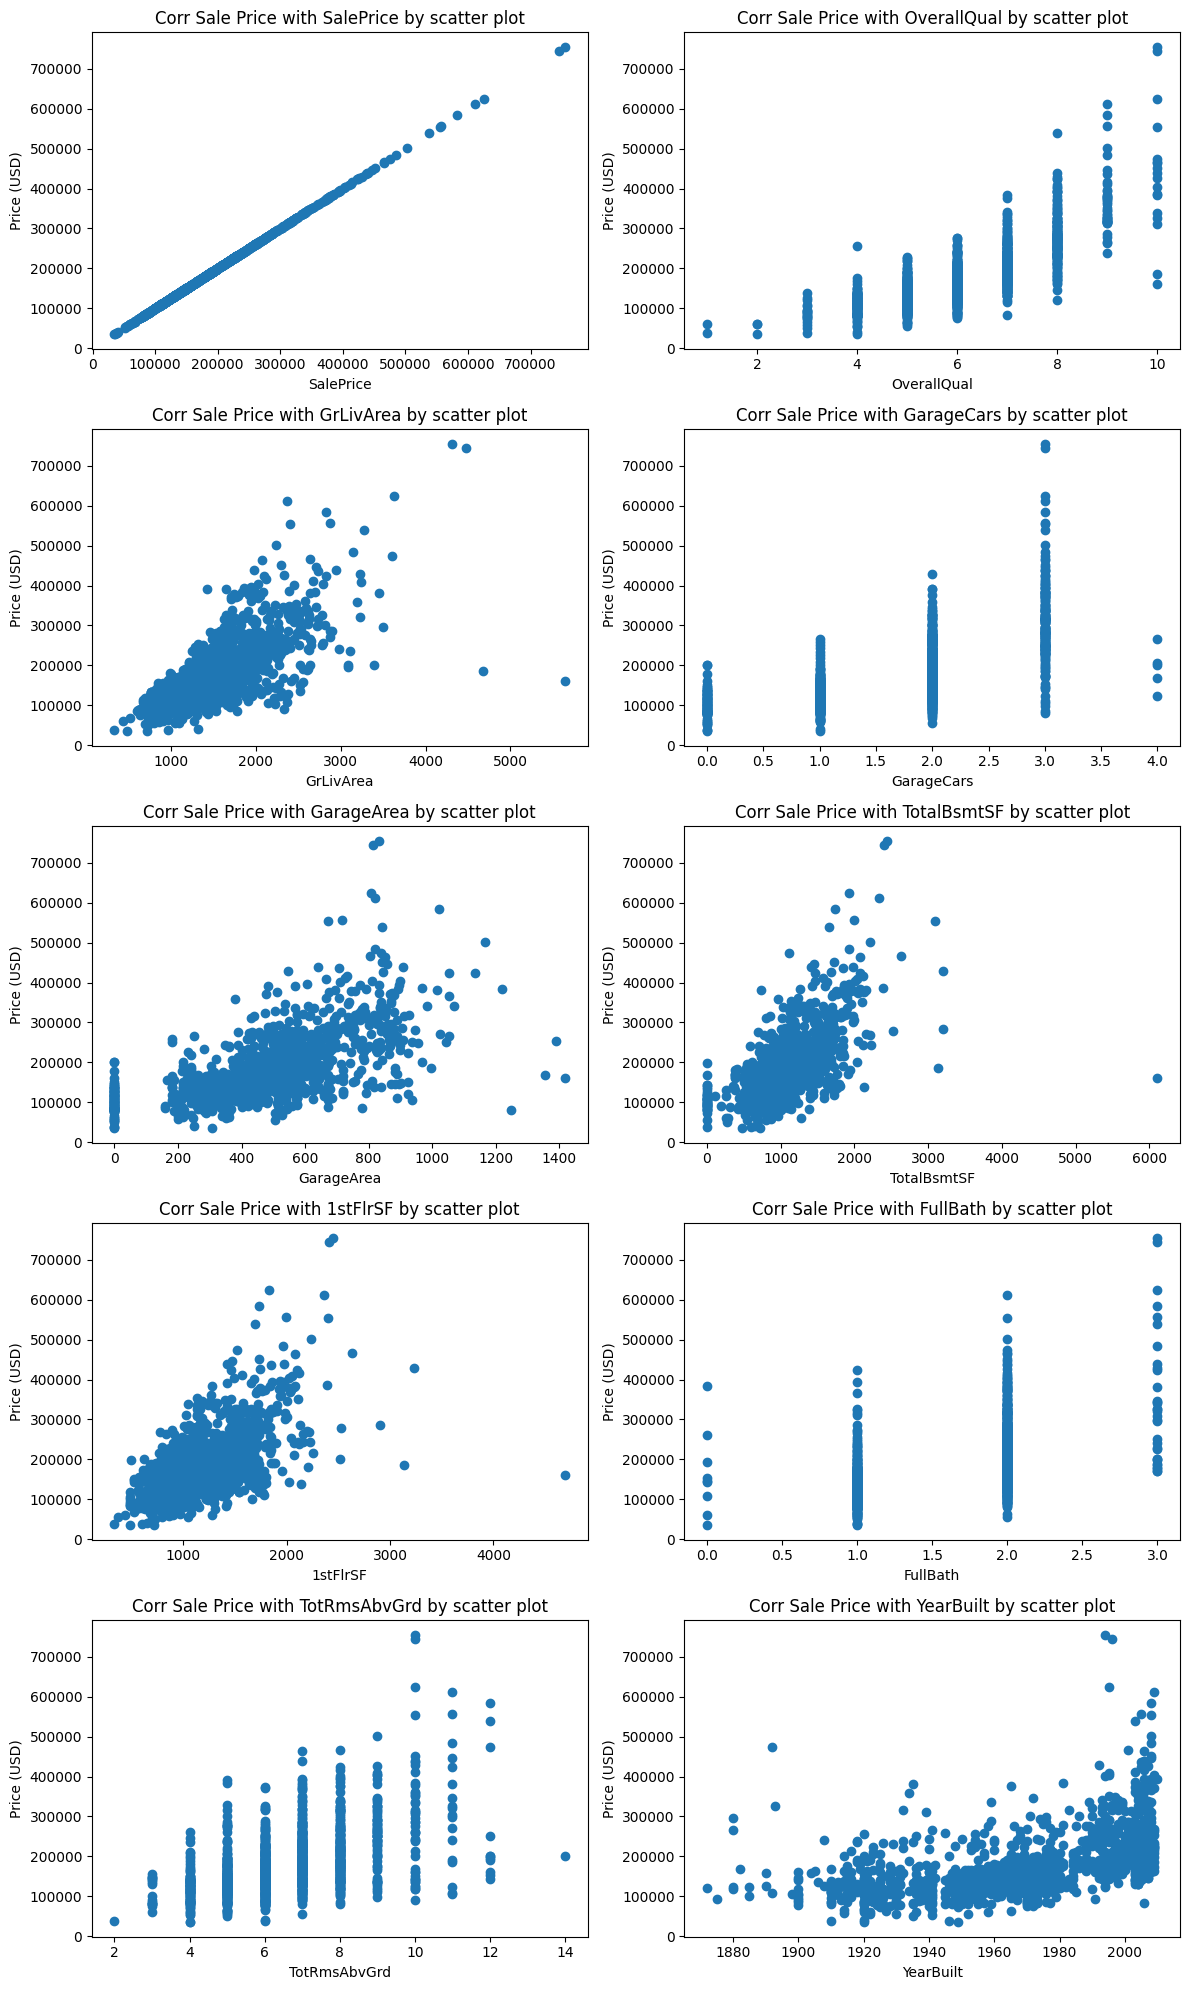

In [102]:
corr_matrix = df[numerical_cols].corr()
corr_matrix = np.abs(corr_matrix)
top_n_corr_cols = corr_matrix['SalePrice'].sort_values(ascending=False).head(10).index
num_rows = math.ceil(len(top_n_corr_cols) / 2)
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))
for i, col in enumerate(top_n_corr_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    ax.scatter(x=df[col], y=df['SalePrice'])
    ax.set_xlabel(col)
    ax.set_ylabel('Price (USD)')
    ax.set_title(f'Corr Sale Price with {col} by scatter plot')


plt.tight_layout()
plt.show()

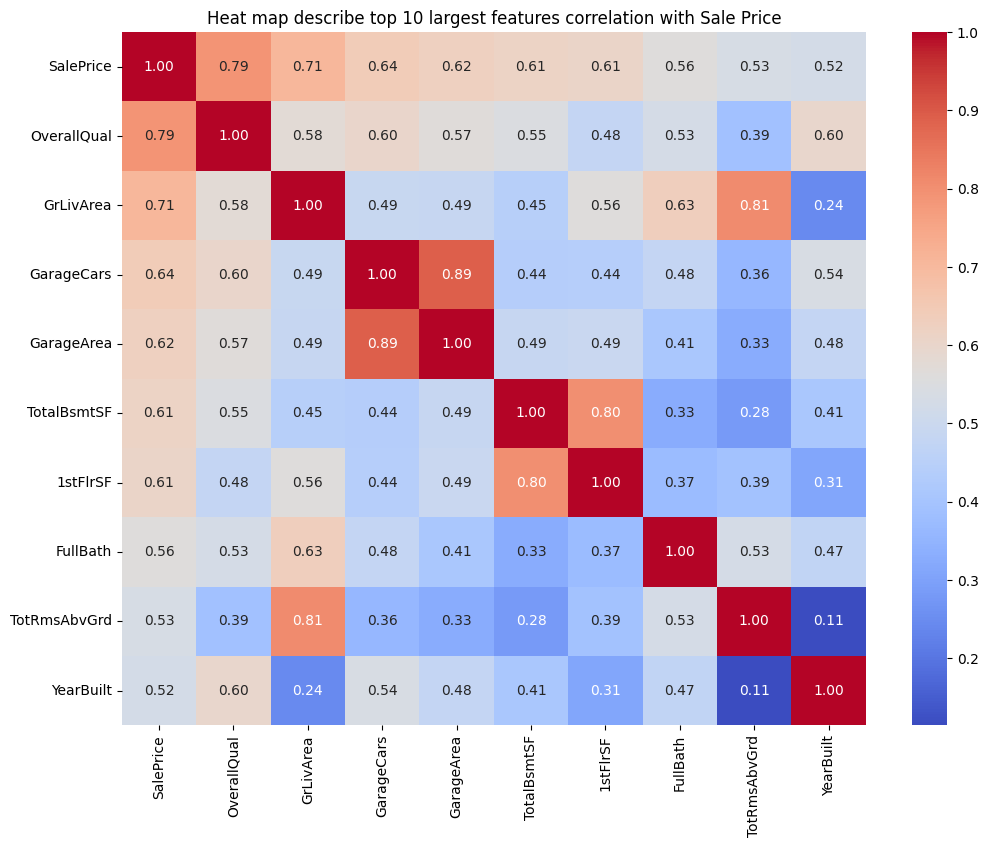

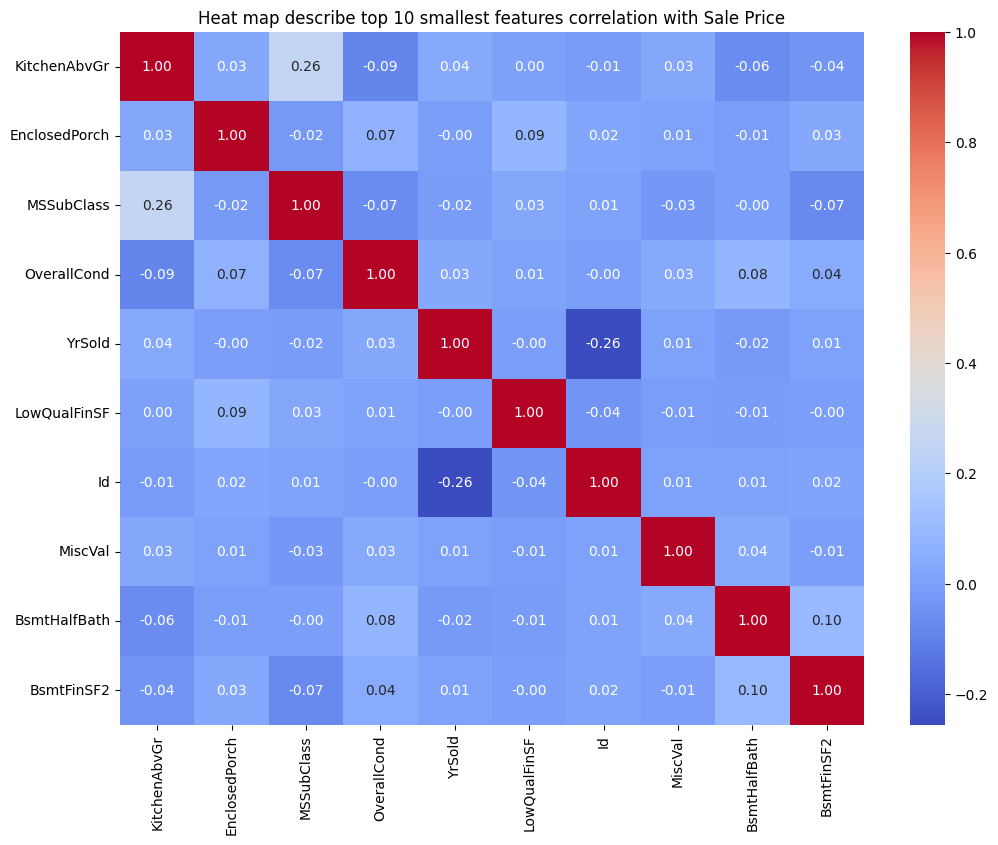

In [103]:
# Heat map numerical columns
selected_cols = df[numerical_cols].corr().nlargest(10, 'SalePrice')['SalePrice'].index
corr_matrix=df[selected_cols].corr()
plt.figure(figsize=(12,9))
sns.heatmap(data=corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Heat map describe top 10 largest features correlation with Sale Price')
plt.show()

selected_cols = df[numerical_cols].corr().nsmallest(10, 'SalePrice')['SalePrice'].index
corr_matrix=df[selected_cols].corr()
plt.figure(figsize=(12,9))
sns.heatmap(data=corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Heat map describe top 10 smallest features correlation with Sale Price')
plt.show()

* Visualize distribution of 'SalePrice' variable. 
* Observe that data has right skewness and it does not follow a normal distribution.

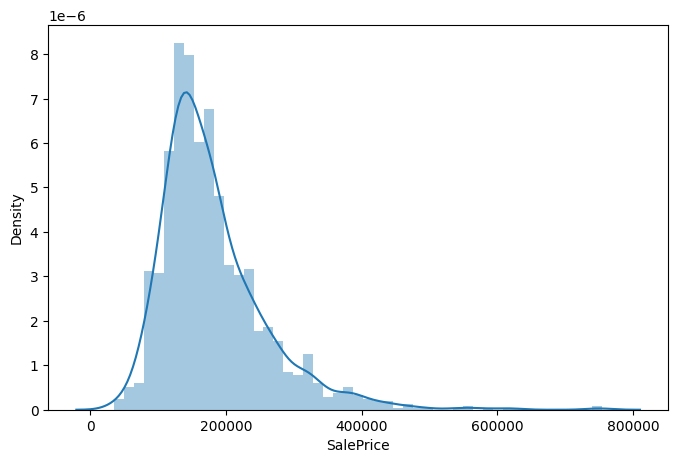

In [104]:
plt.figure(figsize=(8,5))
sns.distplot(df_train['SalePrice'])
plt.show()

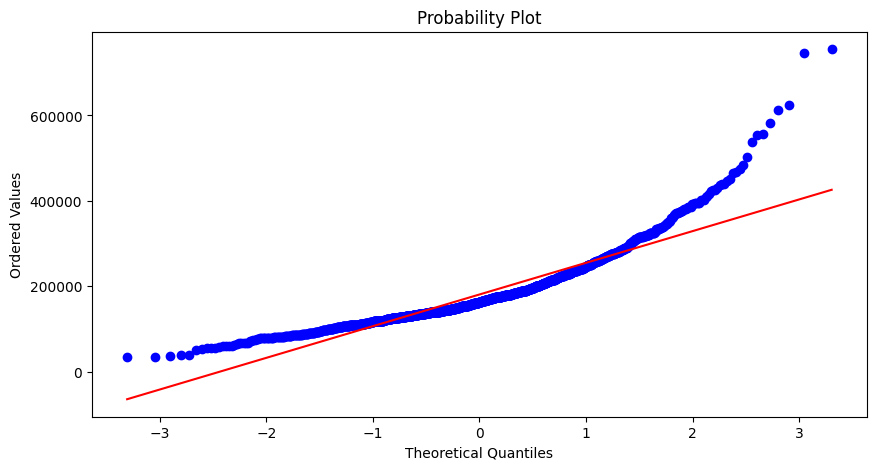

In [105]:
plt.figure(figsize=(10,5))
stats.probplot(df_train['SalePrice'], plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

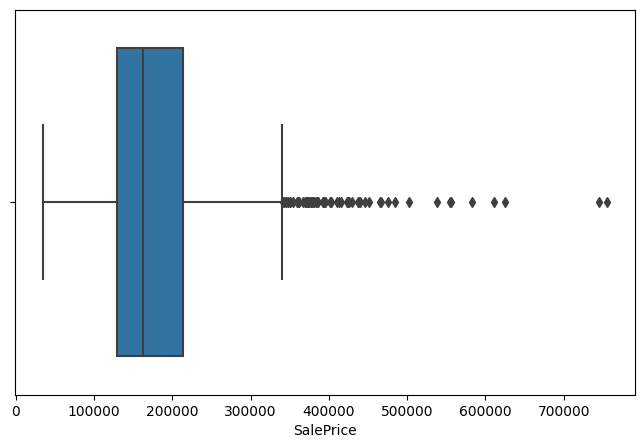

In [106]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['SalePrice'])
plt.show()

### Handle and Normalize data

* We will divide data into 2 types of missing features: Values are null because it do not have, Values are null because it is missing.

In [107]:
null_cols=df.columns[df.isnull().any()]
null_cat_cols=null_cols.intersection(categorical_cols)
null_num_cols=null_cols.intersection(numerical_cols)
null_cat_cols,null_num_cols

(Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
        'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional',
        'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
        'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],
       dtype='object'),
 Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
        'GarageCars', 'GarageArea', 'SalePrice'],
       dtype='object'))

In [108]:
# Value is null because it do not have
null_is_none_cat_cols=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
           'GarageCond', 'GarageFinish' , 'GarageQual', 'GarageType',
           'BsmtCond',  'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType']
null_is_none_num_cols=['GarageCars','GarageYrBlt', 'TotalBsmtSF', 'BsmtUnfSF',
           'BsmtFinSF2', 'BsmtFinSF1', 'MasVnrArea',
           'BsmtFullBath', 'BsmtHalfBath']

df[null_is_none_cat_cols]=df[null_is_none_cat_cols].fillna('None')
df[null_is_none_num_cols]=df[null_is_none_num_cols].fillna(0)
df[df.columns[df.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSZoning     2915 non-null   object 
 1   LotFrontage  2433 non-null   float64
 2   Utilities    2917 non-null   object 
 3   Exterior1st  2918 non-null   object 
 4   Exterior2nd  2918 non-null   object 
 5   Electrical   2918 non-null   object 
 6   KitchenQual  2918 non-null   object 
 7   Functional   2917 non-null   object 
 8   GarageArea   2918 non-null   float64
 9   SaleType     2918 non-null   object 
 10  SalePrice    1460 non-null   float64
dtypes: float64(3), object(8)
memory usage: 251.0+ KB


In [109]:
# Values are null because it is missing
null_is_missing_cat_cols=['MSZoning', 'Utilities', 'Functional','KitchenQual',
                          'Electrical', 'Exterior1st', 'Exterior2nd', 'SaleType']

for col in null_is_missing_cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['GarageArea']=df['GarageArea'].fillna(0)

df['GarageYrBlt']=df['GarageYrBlt'].fillna(0)
df[df.columns[df.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SalePrice  1460 non-null   float64
dtypes: float64(1)
memory usage: 22.9 KB


* Next, we find and remove outliers as observed during visualization

In [110]:
df=df.drop(df.loc[(df['GrLivArea']>4000)&(df['SalePrice']<300000)].index,axis=0)
df=df.drop(df.loc[(df['1stFlrSF']>4000)&(df['SalePrice']<300000)].index,axis=0)
df.shape

(2917, 81)

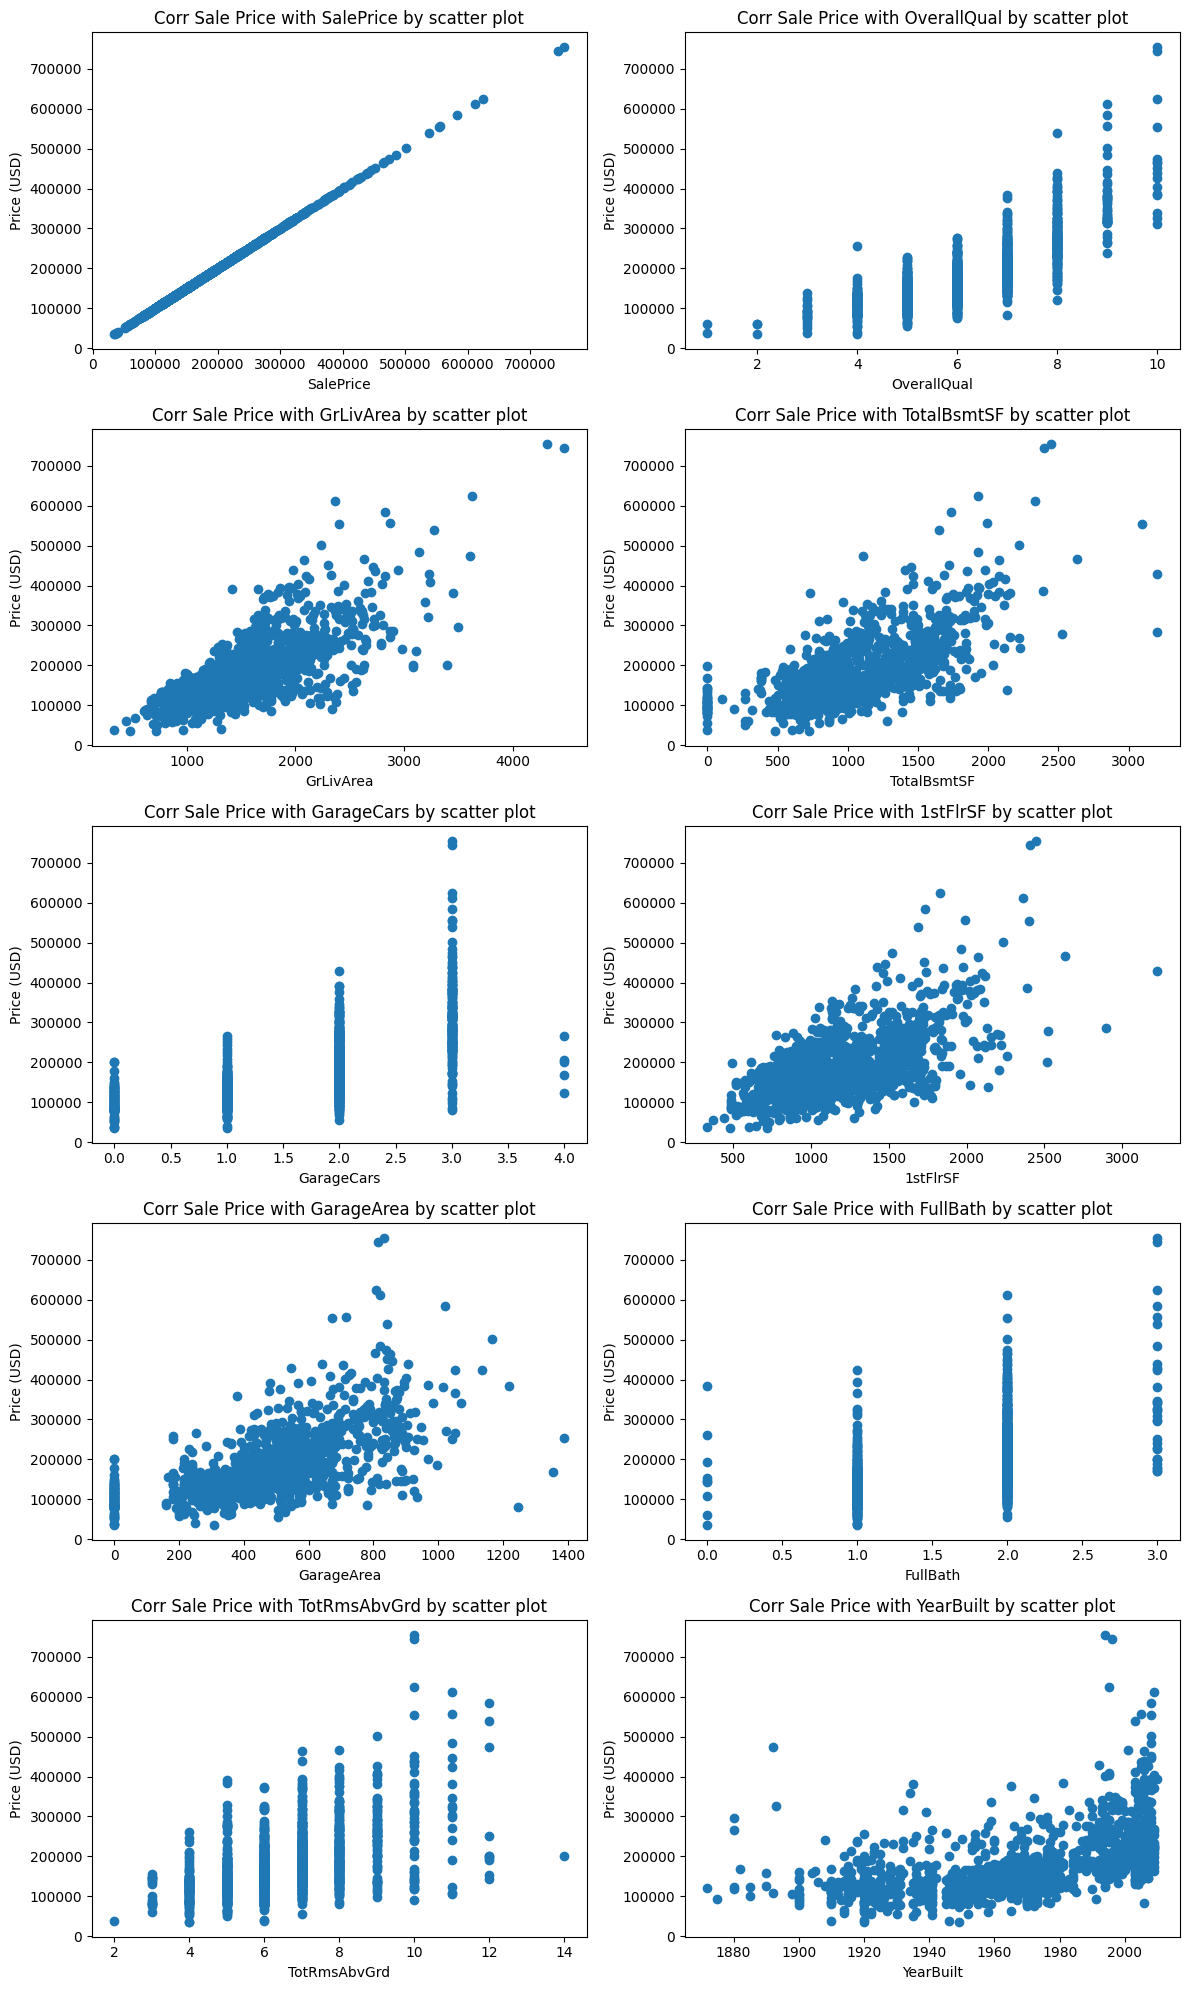

In [111]:
corr_matrix = df[numerical_cols].corr()
corr_matrix = np.abs(corr_matrix)
top_n_corr_cols = corr_matrix['SalePrice'].sort_values(ascending=False).head(10).index
num_rows = math.ceil(len(top_n_corr_cols) / 2)
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))
for i, col in enumerate(top_n_corr_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    ax.scatter(x=df[col], y=df['SalePrice'])
    ax.set_xlabel(col)
    ax.set_ylabel('Price (USD)')
    ax.set_title(f'Corr Sale Price with {col} by scatter plot')


plt.tight_layout()
plt.show()

* Find features that high skew and normalize them to a normal distribution.
* Normalize same with 'SalePrice' features.
* Standardizing the data to a normal distribution will help the regression model calculate better, reduce the influence of outliers, reduce the measurement unit and make the model more stable.

In [112]:
skewness = df[numerical_cols].skew().sort_values(ascending=False)
skewness[abs(skewness) > 0.5]

MiscVal          21.950962
PoolArea         17.697766
LotArea          13.116240
LowQualFinSF     12.090757
3SsnPorch        11.377932
KitchenAbvGr      4.302763
BsmtFinSF2        4.146636
EnclosedPorch     4.004404
ScreenPorch       3.947131
BsmtHalfBath      3.932018
MasVnrArea        2.623068
OpenPorchSF       2.530660
SalePrice         1.881296
WoodDeckSF        1.845741
MSSubClass        1.375838
1stFlrSF          1.257933
LotFrontage       1.225917
GrLivArea         1.069300
BsmtFinSF1        0.981149
BsmtUnfSF         0.920161
2ndFlrSF          0.861999
TotRmsAbvGrd      0.749618
Fireplaces        0.725651
HalfBath          0.697024
TotalBsmtSF       0.672097
BsmtFullBath      0.622735
OverallCond       0.569607
YearBuilt        -0.599503
GarageYrBlt      -3.906642
dtype: float64

In [113]:
skewed_cols = list(skewness[abs(skewness) > 0.5].index)

skewed_cols = [
    col for col in skewed_cols if col not in ['MSSubClass', 'SalePrice']
]

# Log-transform skewed columns
for col in skewed_cols:
    df[col] = np.log(1 + df[col])

In [114]:
df['SalePrice'] = np.log(1 + df['SalePrice'])

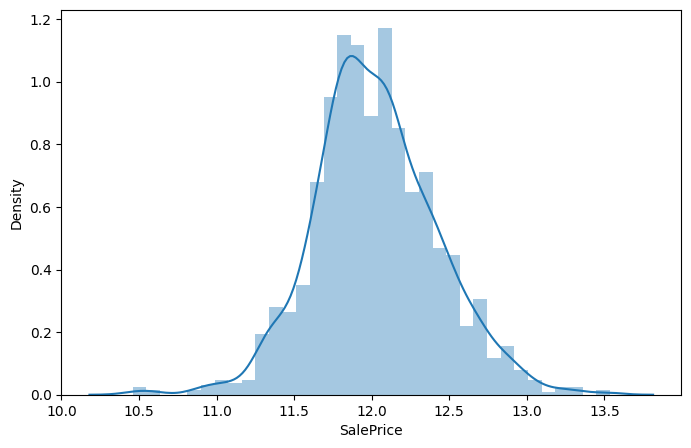

In [115]:
plt.figure(figsize=(8,5))
sns.distplot(df['SalePrice'])
plt.show()

* Visualize and find columns that have very high correlation because it can cause multilinearity and affect the model.

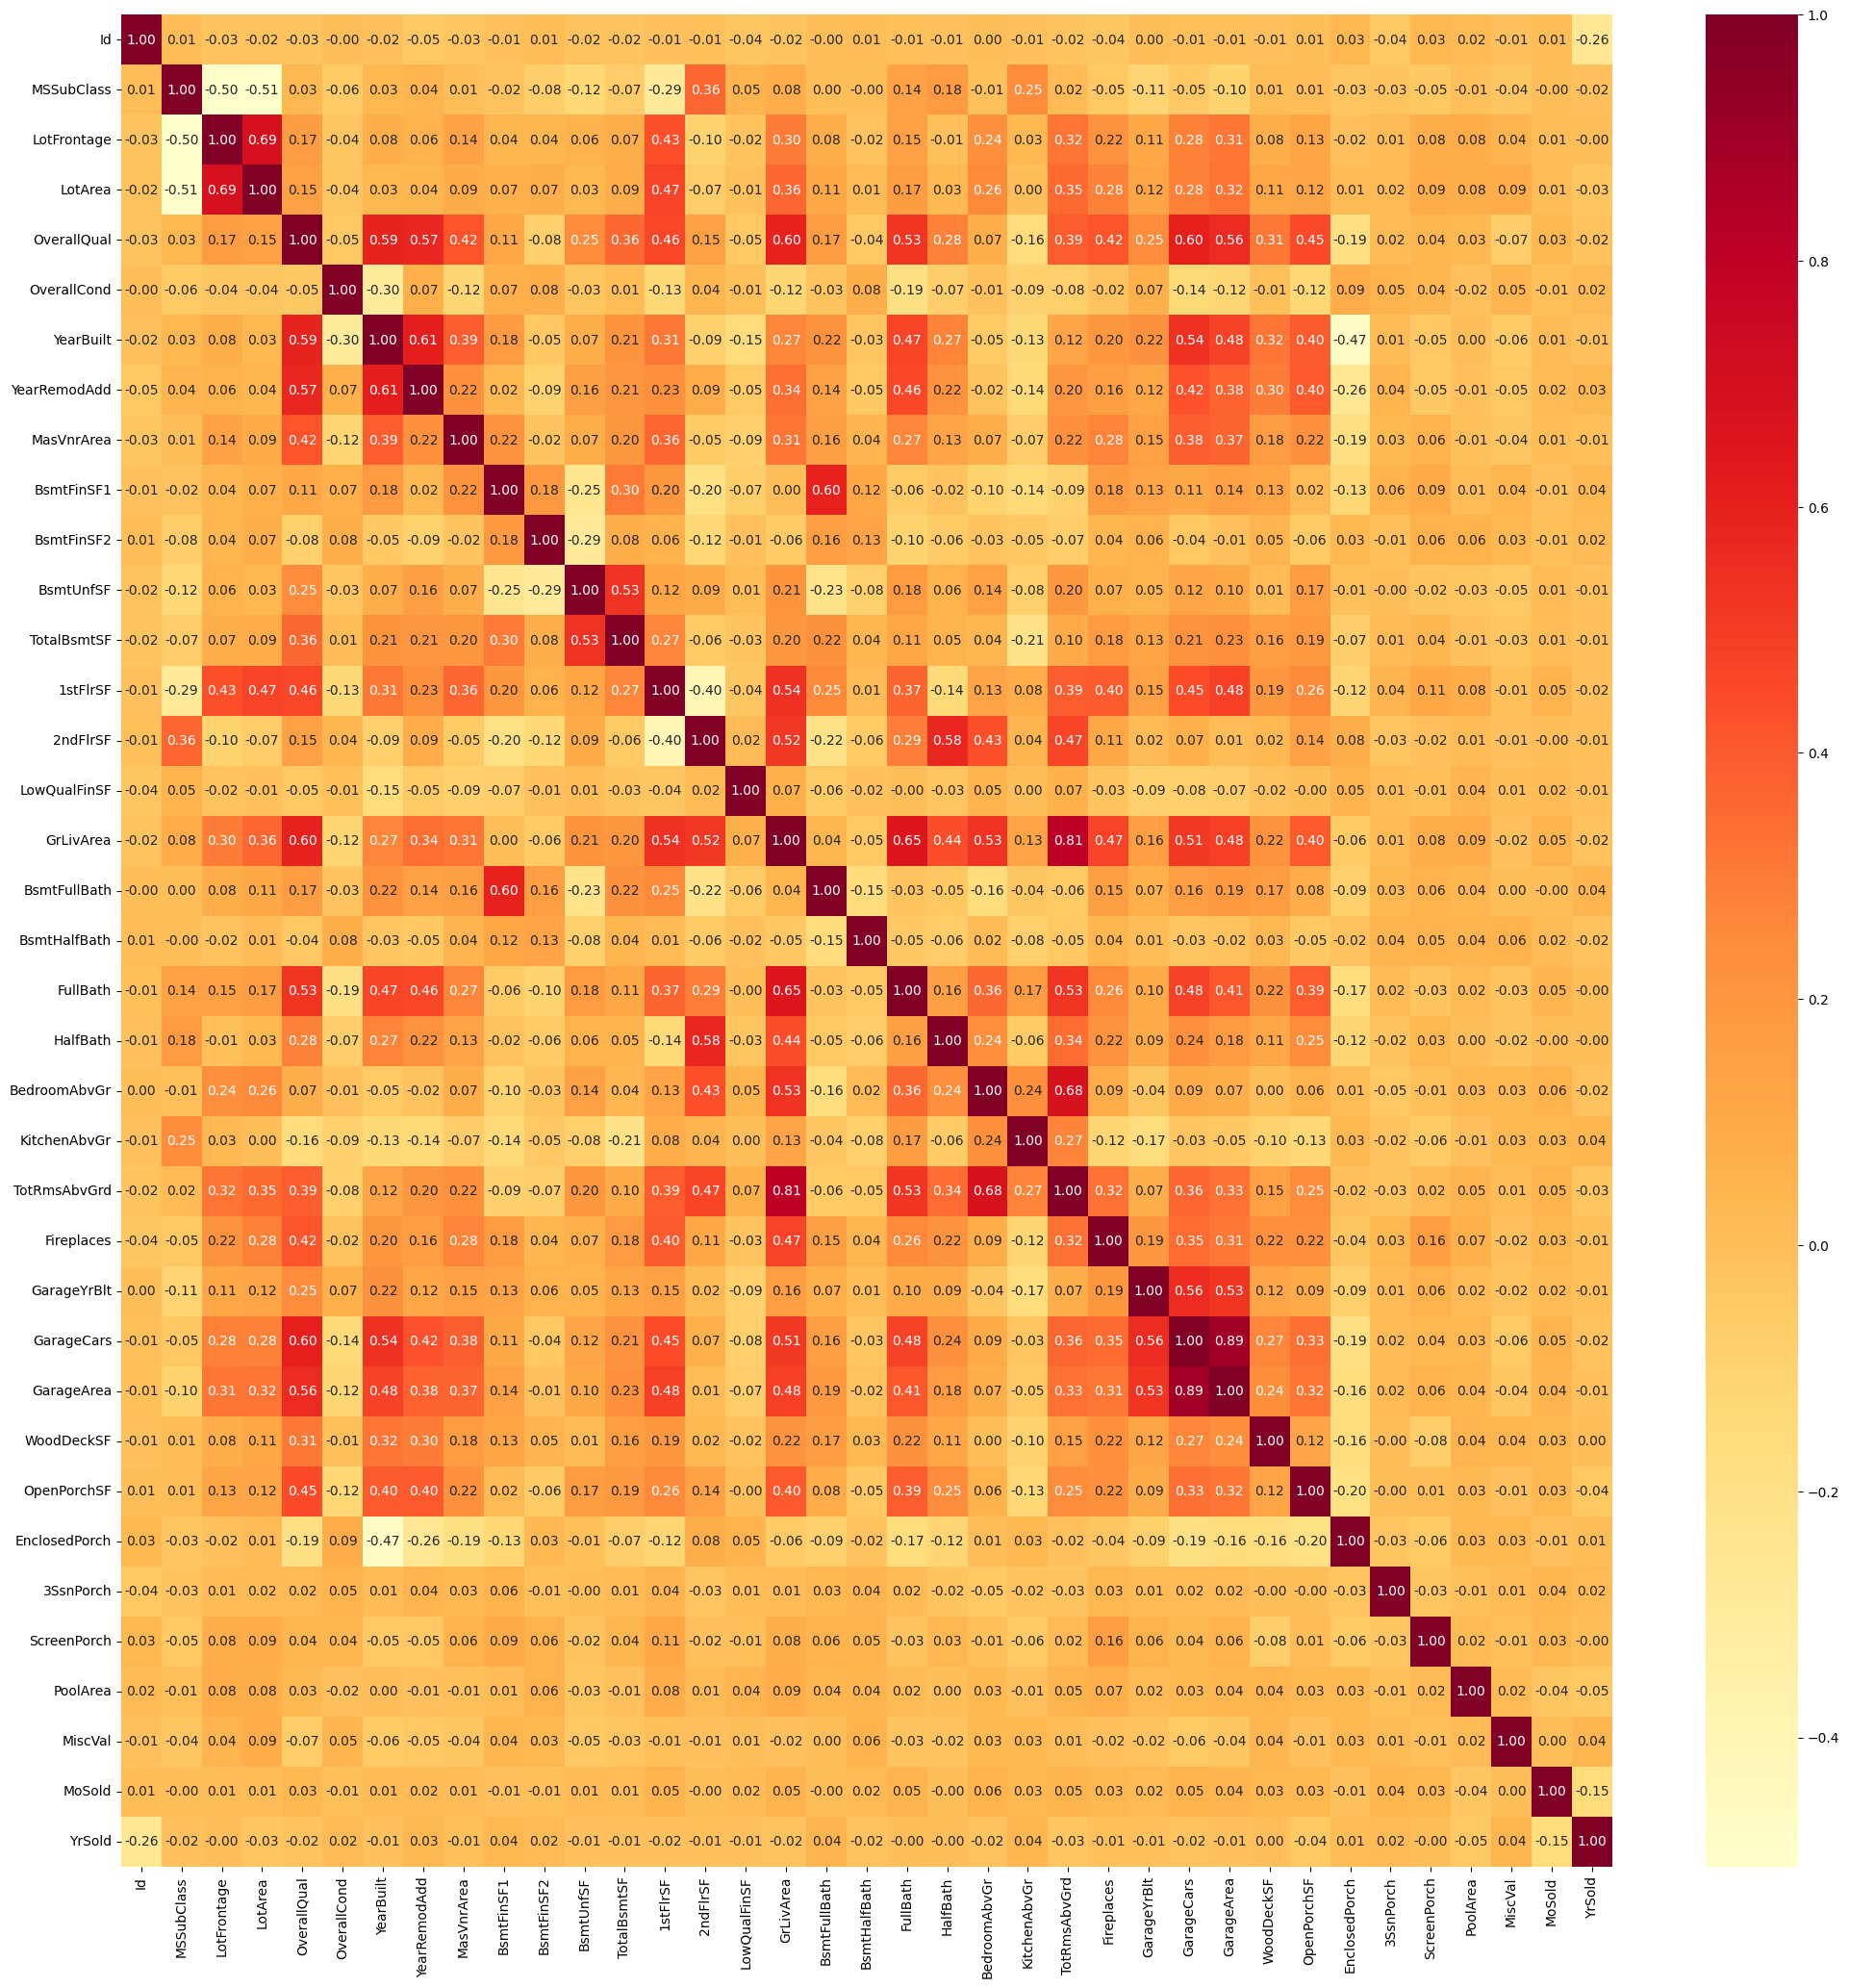

In [116]:
corr_matrix= df[numerical_cols].drop(columns=['SalePrice']).corr()

plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix,annot=True, fmt=".2f",cmap='YlOrRd')
plt.show()

In [117]:
corr_series = corr_matrix.unstack()

sorted_corr_series = corr_series.sort_values(ascending=False)
sorted_corr_df = pd.DataFrame(sorted_corr_series, columns=['correlation'])

sorted_corr_df.reset_index(inplace=True)
sorted_corr_df = sorted_corr_df[sorted_corr_df['level_0'] != sorted_corr_df['level_1']]
sorted_corr_df.set_index(['level_0', 'level_1'], inplace=True)

print(sorted_corr_df.head(10))

                           correlation
level_0      level_1                  
GarageCars   GarageArea       0.892289
GarageArea   GarageCars       0.892289
GrLivArea    TotRmsAbvGrd     0.809242
TotRmsAbvGrd GrLivArea        0.809242
LotFrontage  LotArea          0.685966
LotArea      LotFrontage      0.685966
BedroomAbvGr TotRmsAbvGrd     0.677585
TotRmsAbvGrd BedroomAbvGr     0.677585
FullBath     GrLivArea        0.652239
GrLivArea    FullBath         0.652239


In [118]:
high_corr_cols=['GarageCars']
def drop_high_corr_columns(df,high_corr_cols):
  df=df.drop(columns=high_corr_cols)
  return df

df=drop_high_corr_columns(df,high_corr_cols)
df.shape

(2917, 80)

* Drop index column

In [119]:
def delete_id_col(df):
  df=df.drop(columns='Id',axis=1)
  return df

df=delete_id_col(df)
df.shape

(2917, 79)

### Prepare data

* One hot coding categorical columns and split data.

In [120]:
def handle_categorical_cols(df):
    df_dummies=pd.get_dummies(df,columns=categorical_cols,drop_first=True)
    return df_dummies

df=handle_categorical_cols(df)
df.shape

(2917, 258)

In [121]:
data_train = df.iloc[:1458]
data_test = df.iloc[1458:]
data_test.drop(columns=['SalePrice'],axis=1,inplace=True)
data_train.shape,data_test.shape

((1458, 258), (1459, 257))

In [122]:
X=data_train.drop('SalePrice',axis=1)
y=data_train['SalePrice']

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=40)
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((1166, 257), (1166,), (292, 257), (292,))

### Modeling

In [123]:
# Ridge model
param_ridge = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1, 2,3, 5, 7,10, 20, 50, 100, 200]
}

grid_search = GridSearchCV(Ridge(), param_ridge, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score on training set:", grid_search.best_score_)

ridge_model = grid_search.best_estimator_
test_score = ridge_model.score(X_val, y_val)
print("Score on test set:", test_score)

Best parameters: {'alpha': 5}
Best score on training set: 0.9076007294978335
Score on test set: 0.9248876595213067


In [124]:
ridge_model.fit(X,y)
y_result=ridge_model.predict(data_test)

y_result = np.exp(y_result) - 1

df_result = df_submission[['Id', 'SalePrice']].copy()
df_result['SalePrice'] = y_result
df_result

,Id,SalePrice
0,1461,121580.910684
1,1462,156938.098460
2,1463,184931.510914
3,1464,196813.274481
4,1465,201272.020074
...,...,...
1454,2915,82904.919491
1455,2916,78178.860541
1456,2917,174617.654378
1457,2918,118077.313921


In [125]:
df_result.to_csv('ridge_submission.csv',index=False)

In [126]:
# Lasso model
param_lasso = {
    'alpha': [0.001,0.0015, 0.01,0.03, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100, 200]
}

grid_search=GridSearchCV(Lasso(),param_lasso)
grid_search.fit(X_train,y_train)


print("Best parameters:", grid_search.best_params_)
print("Best score on training set:", grid_search.best_score_)


lasso_model = grid_search.best_estimator_
test_score = lasso_model.score(X_val, y_val)
print("Score on test set:", test_score)

Best parameters: {'alpha': 0.001}
Best score on training set: 0.9073596489216051
Score on test set: 0.9208129319658271


In [127]:
lasso_model.fit(X,y)
y_result=lasso_model.predict(data_test)

y_result = np.exp(y_result) - 1

df_result = df_submission[['Id', 'SalePrice']].copy()
df_result['SalePrice'] = y_result
df_result

,Id,SalePrice
0,1461,122323.796462
1,1462,153974.852870
2,1463,180693.169031
3,1464,193377.357606
4,1465,202543.323181
...,...,...
1454,2915,83848.934704
1455,2916,86469.855263
1456,2917,168929.747615
1457,2918,118085.139738


In [128]:
df_result.to_csv('lasso_submussion.csv',index=False)

In [129]:
# Xgboost model
param_xgb={
    "learning_rate"    : [0.01,0.015, 0.05, 0.10, 0.15, 0.20 ] ,
     "max_depth"        : [ 5,6,8,10,13,15],
     "min_child_weight" : [   5, 6, 7,8, 9 ,11],
     "gamma"            : [  0.0,0.1, 0.2 , 0.3, 0.4],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
     "num_boost_round": [10, 25, 60,100],
     "n_estimators" :[50,100,200,300,500] 
}

xgb_model=XGBRegressor()
grid_search_xgb=RandomizedSearchCV(xgb_model, param_distributions = param_xgb, n_iter=50, cv=5, scoring='neg_mean_squared_error')

grid_search_xgb.fit(X_train, y_train)

print("Best parameters:", grid_search_xgb.best_params_)
print("Best score on training set:", grid_search_xgb.best_score_)

xgb_model = grid_search_xgb.best_estimator_
test_score = xgb_model.score(X_val, y_val)
print("Score on test set:", test_score)

Best parameters: {'num_boost_round': 25, 'n_estimators': 500, 'min_child_weight': 6, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.0, 'colsample_bytree': 0.3}
Best score on training set: -0.016445001289411697
Score on test set: 0.929012342907393


In [130]:
xgb_model.fit(X,y)
y_result=xgb_model.predict(data_test)

y_result = np.exp(y_result) - 1

df_result = df_submission[['Id', 'SalePrice']].copy()
df_result['SalePrice'] = y_result
df_result

,Id,SalePrice
0,1461,127707.851562
1,1462,158364.359375
2,1463,190844.718750
3,1464,203282.093750
4,1465,183762.625000
...,...,...
1454,2915,80047.281250
1455,2916,80472.781250
1456,2917,161835.031250
1457,2918,113892.242188


In [131]:
df_result.to_csv('xgb_submission.csv',index=False)

In [132]:
# Random forest model
rf_model=RandomForestRegressor()

In [133]:
rf_model.fit(X,y)
y_result=gbm_model.predict(data_test)

y_result = np.exp(y_result) - 1

df_result = df_submission[['Id', 'SalePrice']].copy()
df_result['SalePrice'] = y_result
df_result

,Id,SalePrice
0,1461,122732.990815
1,1462,153830.088892
2,1463,190036.913358
3,1464,189471.497385
4,1465,186602.875126
...,...,...
1454,2915,79269.488325
1455,2916,84731.969739
1456,2917,163355.986436
1457,2918,104299.676207


In [134]:
df_result.to_csv('rf_submission.csv',index=False)

In [135]:
# LightGBM model
param_lgbm = {
    "learning_rate"    : [0.01,0.015, 0.05, 0.10, 0.15, 0.20 ] ,
     "max_depth"        : [ 5,6,8,9,10,13],
     "min_child_weight" : [   5, 6, 7,8, 9 ,11],
     "gamma"            : [ 0.1, 0.2 , 0.3, 0.4,0.5],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
     "num_boost_round": [10, 25, 60,100,200],
     "n_estimators" :[50,100,200,300,500,1000]
}

gbm_model = LGBMRegressor(verbosity=-1)
grid_search_lgbm = RandomizedSearchCV(gbm_model,param_distributions = param_lgbm,n_iter=50, cv=5, scoring='neg_mean_squared_error')

grid_search_lgbm.fit(X_train, y_train)

print("Best parameters:", grid_search_lgbm.best_params_)
print("Best score on training set:", grid_search_lgbm.best_score_)

best_model_lgbm = grid_search_lgbm.best_estimator_
test_score = best_model_lgbm.score(X_val, y_val)
print("Score on test set:", test_score)

Best parameters: {'num_boost_round': 200, 'n_estimators': 200, 'min_child_weight': 8, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.3}
Best score on training set: -0.01682165614718162
Score on test set: 0.9262189543609701


In [136]:
gbm_model.fit(X,y)
y_result=gbm_model.predict(data_test)

y_result = np.exp(y_result) - 1

df_result = df_submission[['Id', 'SalePrice']].copy()
df_result['SalePrice'] = y_result
df_result

,Id,SalePrice
0,1461,122732.990815
1,1462,153830.088892
2,1463,190036.913358
3,1464,189471.497385
4,1465,186602.875126
...,...,...
1454,2915,79269.488325
1455,2916,84731.969739
1456,2917,163355.986436
1457,2918,104299.676207


In [137]:
df_result.to_csv('lgbm_submission.csv',index=False)

In [138]:
# Ensemble model
ensemble_model= VotingRegressor([('ridge',ridge_model),('lasso', lasso_model),('rf',rf_model), ('xgb', xgb_model), ('gbm',gbm_model)])
ensemble_model.fit(X_train,y_train)

VotingRegressor(estimators=[('ridge', Ridge(alpha=5)),
                            ('lasso', Lasso(alpha=0.001)),
                            ('rf', RandomForestRegressor()),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.3, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=0...
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.05, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=5,
                                          max_leaves=None, min_child_weight=6,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=500,
                                          n_jobs=None, num_boost_round=25,
                                          num_parallel_tree=None, ...)),
                            ('gbm', LGBMRegressor(verbosity=-1))])

In [139]:
ensemble_pred=ensemble_model.predict(X_val)
score=mean_squared_error(y_val,ensemble_pred)
print(f'Emsemble regression score: {score}')

Emsemble regression score: 0.010072057837573273


In [140]:
ensemble_model.fit(X,y)
y_result=ensemble_model.predict(data_test)

y_result = np.exp(y_result) - 1

df_result = df_submission[['Id', 'SalePrice']].copy()
df_result['SalePrice'] = y_result
df_result

,Id,SalePrice
0,1461,123867.909629
1,1462,155723.514690
2,1463,184975.224561
3,1464,193062.877564
4,1465,194121.378083
...,...,...
1454,2915,81571.413950
1455,2916,82405.788754
1456,2917,164568.816434
1457,2918,113632.622278


In [141]:
df_result.to_csv('ensemble_submission.csv',index=False)